In [4]:
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from time import sleep
from random import randint
from time import time;start_time = time()
from IPython.core.display import clear_output
import warnings
warnings.warn("Warning Simulation")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Warning Simulation
  # Remove the CWD from sys.path while we load stuff.


In [5]:
# Redeclaring the lists to store data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

# Preparing the monitoring of the loop
start_time = time()
requests = 0

In [7]:
pages = [str(i) for i in range(1,5)]
years_url = [str(i) for i in range(2000,2018)]

In [9]:
headers = {"Accept-Language": "en-US, en;q=0.5"}

In [10]:
# For every year in the interval 2000-2017
for year_url in years_url:

    # For every page in the interval 1-4
    for page in pages:
        
        
         # Make a get request
        response = get('http://www.imdb.com/search/title?release_date=' + year_url +
        '&sort=num_votes,desc&page=' + page, headers = headers)

        # Pause the loop
        sleep(randint(8,15))

        # Monitor the requests
        requests += 1
        elapsed_time = time() - start_time
        print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
        clear_output(wait = True)
        
        
        # Throw a warning for non-200 status codes
        if response.status_code != 200:
            warn('Request: {}; Status code: {}'.format(requests, response.status_code))
            
          # Break the loop if the number of requests is greater than expected
        if requests > 72:
            warn('Number of requests was greater than expected.')
            break
            
         # Parse the content of the request with BeautifulSoup
        page_html = BeautifulSoup(response.text, 'html.parser')

        # Select all the 50 movie containers from a single page
        mv_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')

        # For every movie of these 50
        for container in mv_containers:
            # If the movie has a Metascore, then:
            if container.find('div', class_ = 'ratings-metascore') is not None:
                
                # Scrape the name
                name = container.h3.a.text
                names.append(name)

                # Scrape the year
                year = container.h3.find('span', class_ = 'lister-item-year').text
                years.append(year)

                # Scrape the IMDB rating
                imdb = float(container.strong.text)
                imdb_ratings.append(imdb)

                # Scrape the Metascore
                m_score = container.find('span', class_ = 'metascore').text
                metascores.append(int(m_score))

                # Scrape the number of votes
                vote = container.find('span', attrs = {'name':'nv'})['data-value']
                votes.append(int(vote))           

Request:72; Frequency: 0.05502972817756019 requests/s


In [11]:
movie_ratings = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes
})
print(movie_ratings.info())
movie_ratings.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 5 columns):
movie        3276 non-null object
year         3276 non-null object
imdb         3276 non-null float64
metascore    3276 non-null int64
votes        3276 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 128.1+ KB
None


,movie,year,imdb,metascore,votes
0,Gladiator,(2000),8.5,67,1292498
1,Memento,(2000),8.4,80,1086235
2,Snatch,(2000),8.3,55,759102
3,Requiem for a Dream,(2000),8.3,68,740612
4,X-Men,(2000),7.4,64,557928
5,Cast Away,(2000),7.8,73,504066
6,American Psycho,(2000),7.6,64,465497
7,Unbreakable,(2000),7.3,62,376745
8,Mission: Impossible II,(2000),6.1,59,305162
9,Meet the Parents,(2000),7.0,73,303540


In [12]:
movie_ratings

,movie,year,imdb,metascore,votes
0,Gladiator,(2000),8.5,67,1292498
1,Memento,(2000),8.4,80,1086235
2,Snatch,(2000),8.3,55,759102
3,Requiem for a Dream,(2000),8.3,68,740612
4,X-Men,(2000),7.4,64,557928
...,...,...,...,...,...
3271,Bright,(I) (2017),6.3,29,162050
3272,Darkest Hour,(2017),7.4,75,161799
3273,Valerian and the City of a Thousand Planets,(2017),6.5,51,155131
3274,Baywatch,(2017),5.5,37,153667


In [13]:
movie_ratings = movie_ratings[['movie', 'year', 'imdb', 'metascore', 'votes']]
movie_ratings

,movie,year,imdb,metascore,votes
0,Gladiator,(2000),8.5,67,1292498
1,Memento,(2000),8.4,80,1086235
2,Snatch,(2000),8.3,55,759102
3,Requiem for a Dream,(2000),8.3,68,740612
4,X-Men,(2000),7.4,64,557928
...,...,...,...,...,...
3271,Bright,(I) (2017),6.3,29,162050
3272,Darkest Hour,(2017),7.4,75,161799
3273,Valerian and the City of a Thousand Planets,(2017),6.5,51,155131
3274,Baywatch,(2017),5.5,37,153667


In [14]:
movie_ratings['year'].unique()

array(['(2000)', '(I) (2000)', '(2001)', '(2002)', '(2003)', '(2004)',
       '(I) (2004)', '(2005)', '(I) (2005)', '(2006)', '(I) (2006)',
       '(2007)', '(I) (2007)', '(2008)', '(I) (2008)', '(2009)',
       '(I) (2009)', '(2010)', '(I) (2010)', '(2011)', '(I) (2011)',
       '(2012)', '(I) (2012)', '(2013)', '(I) (2013)', '(2014)',
       '(I) (2014)', '(II) (2014)', '(2015)', '(I) (2015)', '(II) (2015)',
       '(2016)', '(II) (2016)', '(IX) (2016)', '(I) (2016)', '(2017)',
       '(I) (2017)'], dtype=object)

In [15]:
movie_ratings.loc[:, 'year'] = movie_ratings['year'].str[-5:-1].astype(int)

In [19]:
movie_ratings['year']

0       2000
1       2000
2       2000
3       2000
4       2000
        ... 
3271    2017
3272    2017
3273    2017
3274    2017
3275    2017
Name: year, Length: 3276, dtype: int32

In [20]:
movie_ratings.describe().loc[['min','max'],['imdb','metascore']]

,imdb,metascore
min,4.1,24.0
max,9.0,100.0


In [21]:
movie_ratings

,movie,year,imdb,metascore,votes
0,Gladiator,2000,8.5,67,1292498
1,Memento,2000,8.4,80,1086235
2,Snatch,2000,8.3,55,759102
3,Requiem for a Dream,2000,8.3,68,740612
4,X-Men,2000,7.4,64,557928
...,...,...,...,...,...
3271,Bright,2017,6.3,29,162050
3272,Darkest Hour,2017,7.4,75,161799
3273,Valerian and the City of a Thousand Planets,2017,6.5,51,155131
3274,Baywatch,2017,5.5,37,153667


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [4]:
data = pd.read_csv('C:/Users/SRIRAM SRIPADA/Desktop/DATASETS/movie_ratings.csv')
data

,movie,year,imdb,metascore,votes
0,Gladiator,2000,8.5,67,1292498
1,Memento,2000,8.4,80,1086235
2,Snatch,2000,8.3,55,759102
3,Requiem for a Dream,2000,8.3,68,740612
4,X-Men,2000,7.4,64,557928
...,...,...,...,...,...
3271,Bright,2017,6.3,29,162050
3272,Darkest Hour,2017,7.4,75,161799
3273,Valerian and the City of a Thousand Planets,2017,6.5,51,155131
3274,Baywatch,2017,5.5,37,153667


In [5]:
data.head()

,movie,year,imdb,metascore,votes
0,Gladiator,2000,8.5,67,1292498
1,Memento,2000,8.4,80,1086235
2,Snatch,2000,8.3,55,759102
3,Requiem for a Dream,2000,8.3,68,740612
4,X-Men,2000,7.4,64,557928


In [6]:
data.tail()

,movie,year,imdb,metascore,votes
3271,Bright,2017,6.3,29,162050
3272,Darkest Hour,2017,7.4,75,161799
3273,Valerian and the City of a Thousand Planets,2017,6.5,51,155131
3274,Baywatch,2017,5.5,37,153667
3275,American Made,2017,7.2,65,150733


In [7]:
data.describe()

,year,imdb,metascore,votes
count,3276.000000,3276.000000,3276.000000,3.276000e+03
mean,2008.412698,7.117949,63.340659,3.472507e+05
std,5.205342,0.734216,15.612559,2.347606e+05
min,2000.000000,4.100000,24.000000,9.901600e+04
25%,2004.000000,6.600000,52.000000,1.992070e+05
50%,2008.000000,7.200000,64.000000,2.685180e+05
75%,2013.000000,7.700000,75.000000,4.152690e+05
max,2017.000000,9.000000,100.000000,2.216245e+06


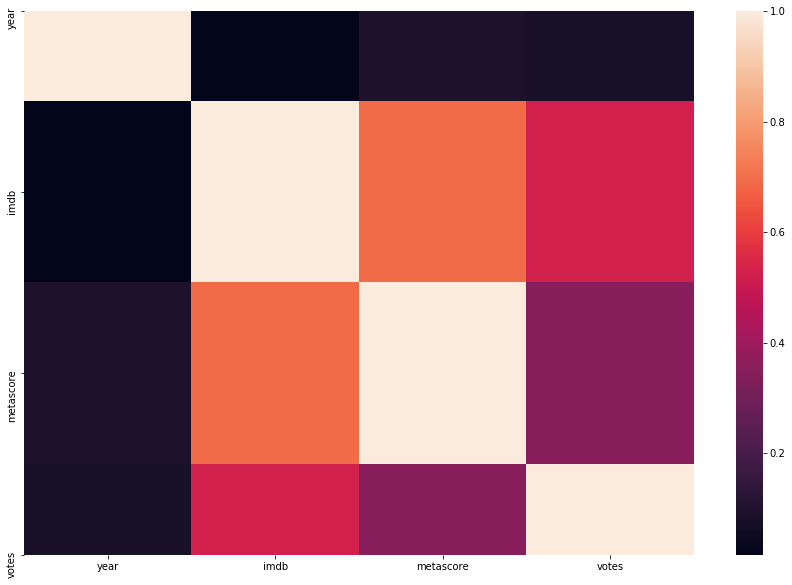

In [8]:
%matplotlib inline
plt.figure(figsize=(15, 10))
corr = data.corr()
sns.heatmap(corr,xticklabels = corr.columns,yticklabels = corr.columns)

#we can observe that metascore and votes affect the imdb rating the most

In [11]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

Text(0, 0.5, 'imdb rating')

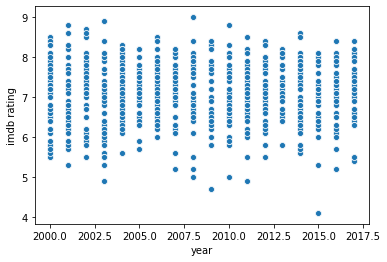

In [12]:
sns.scatterplot(x=data['year'],y=data['imdb']);
fig.suptitle('test title')
plt.xlabel('year')
plt.ylabel('imdb rating')

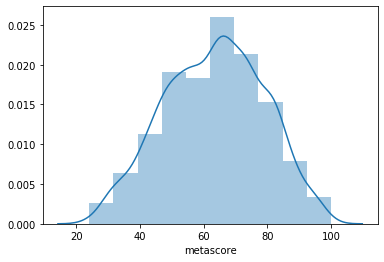

In [15]:
sns.distplot(data['metascore'],bins=10)
#majority of movies have an average metascore = 64 from 2000-2017

In [ ]:
plt.bar(data['PN'],data['TH'],color='blue',edgecolor='black')
plt.xlabel('Type of Protocol')
plt.ylabel('Throughput')
plt.title('Type of protocol vs Throughput')
plt.show()

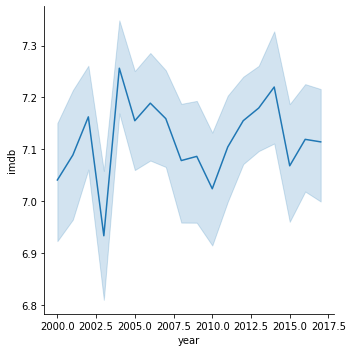

In [16]:
sns.relplot(x = 'year', y = 'imdb', kind = 'line', data = data, sort = True)
#from 2003-2010 constant decrease means that low rated movies and movies didnot perform well during this time
# from year 2010 to 2014 there is a constant increase in graph means that high rated and best movies were released during this time

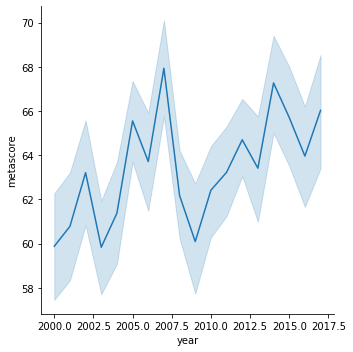

In [18]:
sns.relplot(x = 'year', y = 'metascore', kind = 'line', data = data, sort = True)

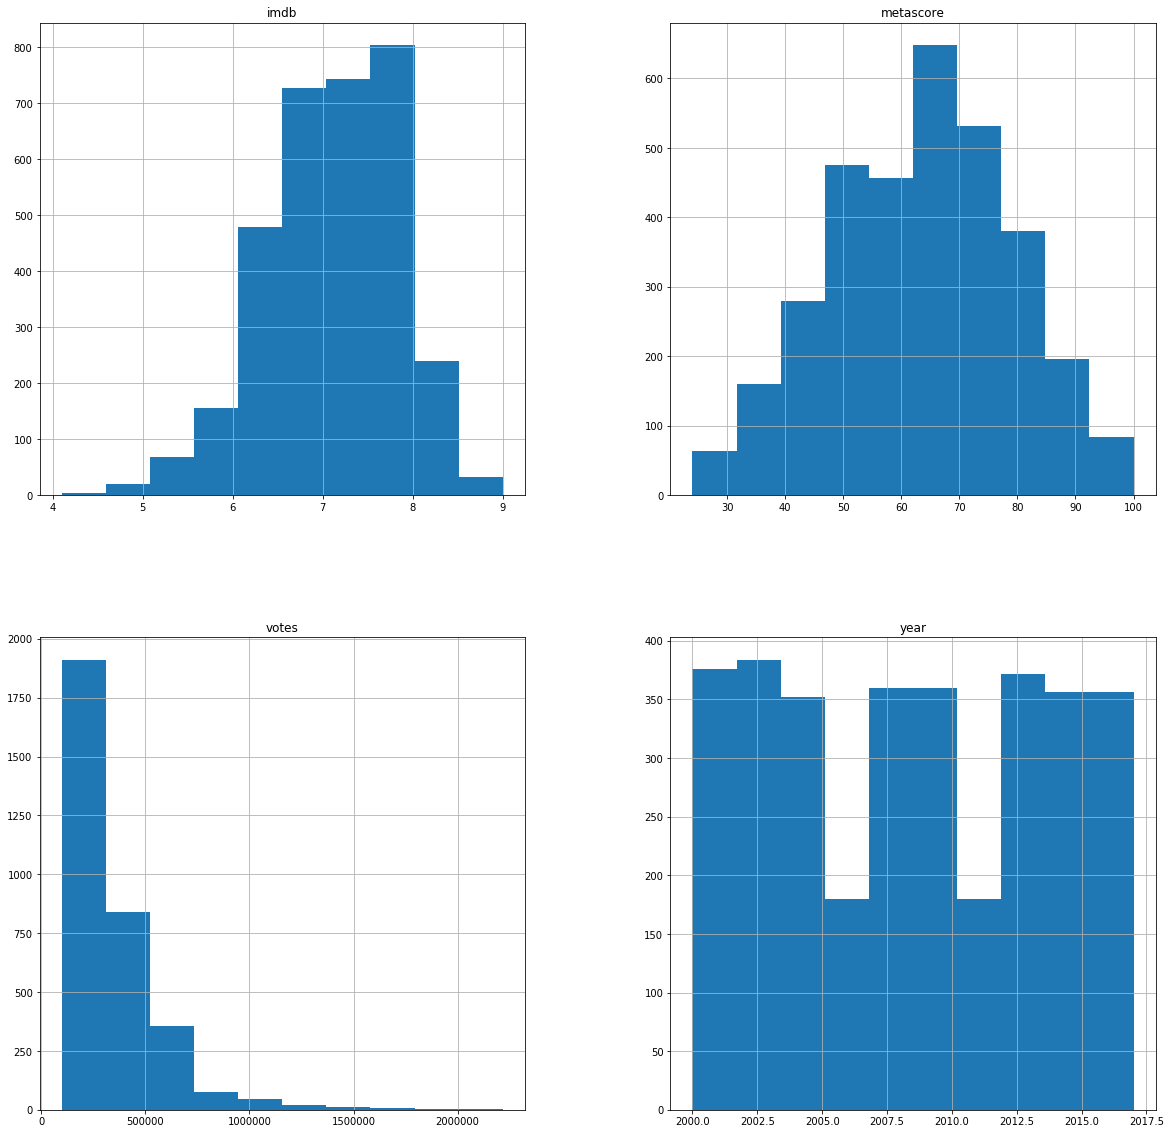

In [17]:
num_bins = 10
data.hist(bins=num_bins, figsize=(20,20))
plt.savefig("hr_histogram_plots")
plt.show()

#most of the movie imdb ratings are between 6 to 8 . There are few movies with a rating greater than 8, and even fewer 
#with a rating smaller than 4. This indicates that both very good movies and very bad movies are rarer.

#most of the movies have meatscore between 60 - 70 meaning that movies perfomed averagely well

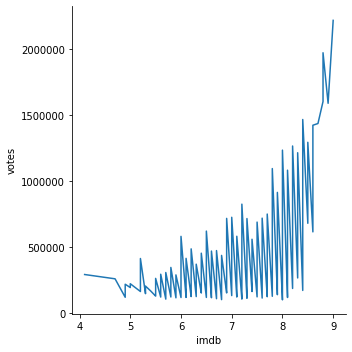

In [20]:
sns.relplot(x = 'imdb', y = 'votes', estimator = None, kind = 'line', data = data)

#as the imdb rating increases votes also increased
#most of movie votes lie in range of 50,000